# Regression plot

A regression plot is somewhat an enhanced version of a scatter plot in that it also illustrates data instances in a two-dimensional system, however, with an estimated correlation visualized as well. The visualization is in the form of a line (either straight or curvy) that represents a regression model that estimates values in one column using those from the other.

Below is an example of a regression plot where the estimation is a linear regression model.

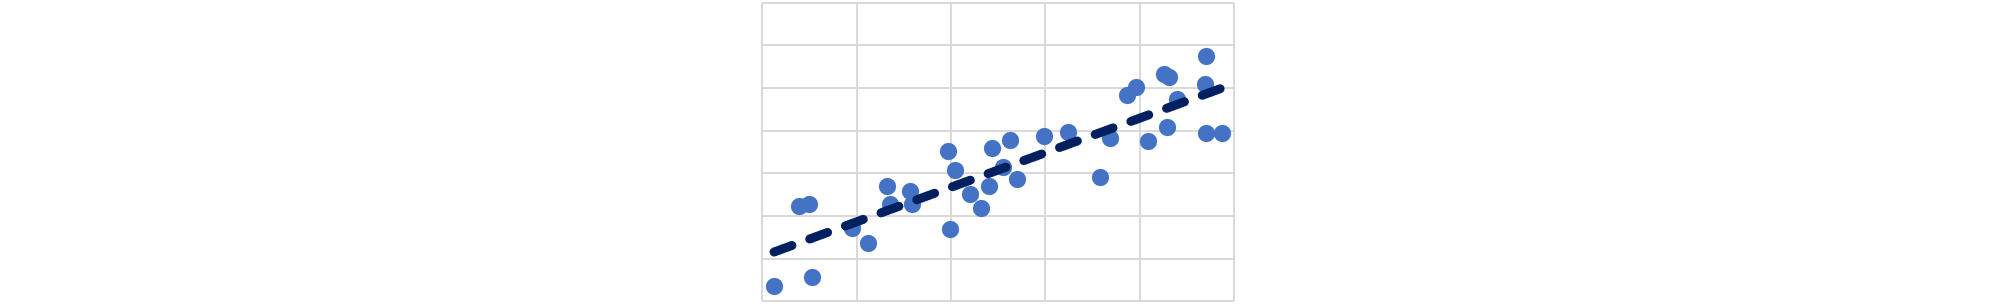

However, the correlation between two columns is not always linear. In this notebook, we will go through visualizations of different types of regression models. We will only use seaborn in this tutorial because while matplotlib can do this, it becomes unnecessarily complicated.

## Loading data

Like usual, we use the auto-mpg data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv('data/auto-mpg.csv')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,North America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,North America,buick skylark 320


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Basic linear regression plot

We draw regression plots using the `seaborn.regplot()` function. At minimum, we need to provide the data and two columns, `x` and `y`. Column `x` will be the input of the regression model, and `y` its output: $y=f(x)$. 

Without any further specification, `regplot()` automatically fit a linear regression $y = ax + b$ and draw the estimation line with 95% confidence interval

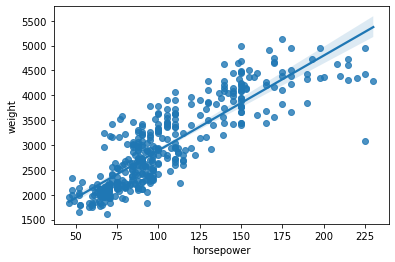

In [3]:
x = 'horsepower'
y = 'weight'

sn.regplot(
    data=data,
    x=x,
    y=y
)
plt.show()

We can certainly adjust the plot for better presentation. The properties of markers in the plot can be modified through `scatter_kws`, and that of the regression line, `line_kws`. Both are dictionaries with property names and values as key-value pairs.

A line spanning the lower-left corner to the upper-right corner of the plot indicates a positive correlation between $x$ and $y$.

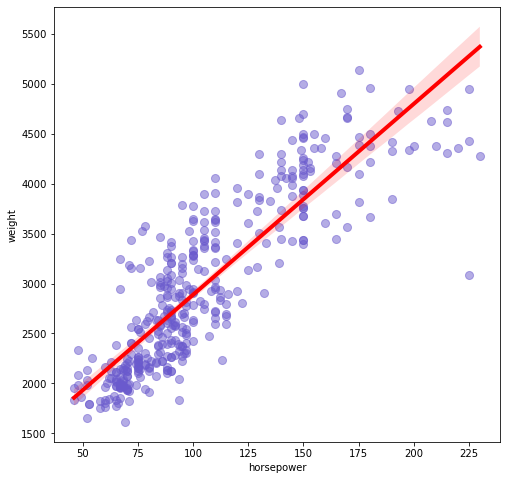

In [4]:
x = 'horsepower'
y = 'weight'
title = 'Scatter plot of weight and horsepower with linear fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.show()

Below is an example of a negative correlation with the regression line spanning the upper-left corner to the lower-right corner of the plot

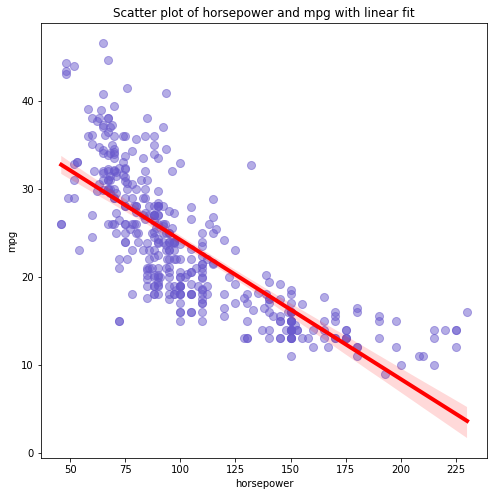

In [5]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with linear fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

## Non-linear regression

The correlation between two columns is not always linear in which case, a linear regression model is not enough. In a scatter plot, we will see the markers forming a non-straight pattern that cannot be covered by a linear line.

Below is one example

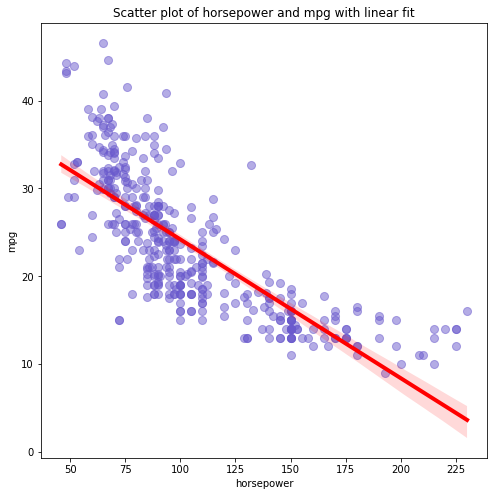

In [6]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with linear fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

### Polynomial regression

The first method that can fit a non-linear line between the two columns is polynomial regression. This simply means the function between `x` and `y` is a higher-degree polynomial instead of linear. For example, a quadratic model is $y = ax^2 + bx + c$, or a cubic model $y = ax^3 + bx^2 + cx + d$, and so on.

In seaborn, we simply add the option `order=` along with the polynomial degree. However, you should also note that orders higher than 2 are very uncommon and rarely needed.

For example, order 2

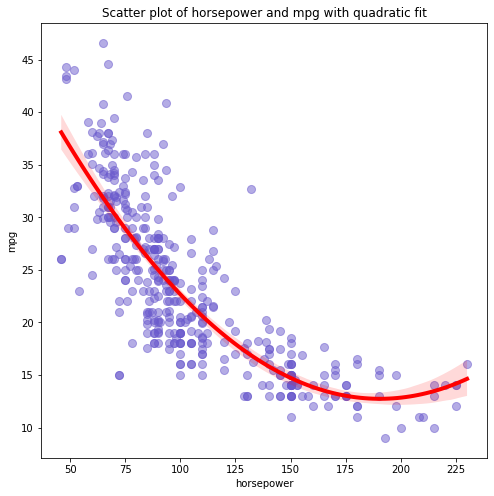

In [7]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with quadratic fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    order=2,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

Order 6 polynomial. You can see the curve is unnecessarily complicated

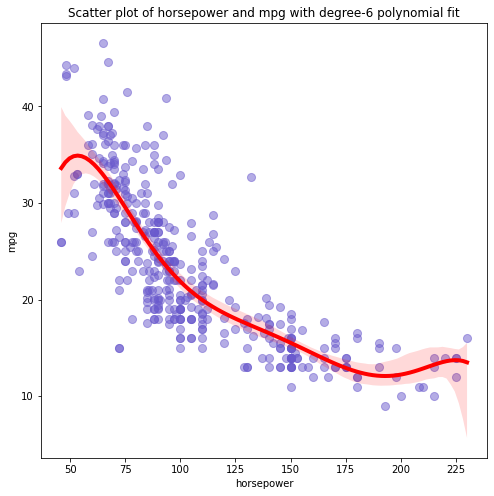

In [8]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with degree-6 polynomial fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    order=6,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

### Log regression

This model performs a log transformation on $x$ then fits a linear model. The equation is $y = alog(x) + b$ which is also able to represent a non-straight line.

In seaborn, we add the option `logx=True` to `regplot()`

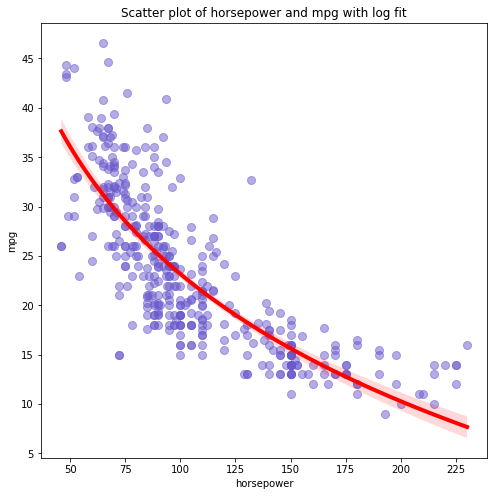

In [9]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with log fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    logx=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

### Local Weighted Estimation - LOWESS

Lowess is a non-parametric regression model. Roughly speaking, it fits multiple linear regression models on continuous local regions of data. The fitted line is a continuous line, however, no longer has a simple deterministic equation. We also lose the confidence interval bands when using lowess.

In seaborn, we fit a lowess line with option `lowess=True`

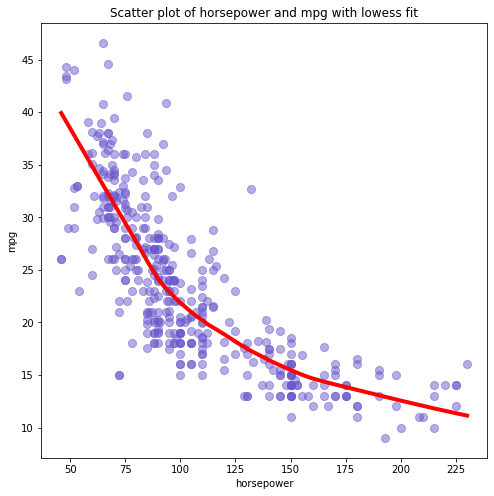

In [10]:
x = 'horsepower'
y = 'mpg'
title = 'Scatter plot of horsepower and mpg with lowess fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    lowess=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

Lowess can fit complicated patterns without us having to specify, for example, the polynomial order. However, it is more difficult to explain the correlation between two columns with a lowess model.

For example, a curve with two turns

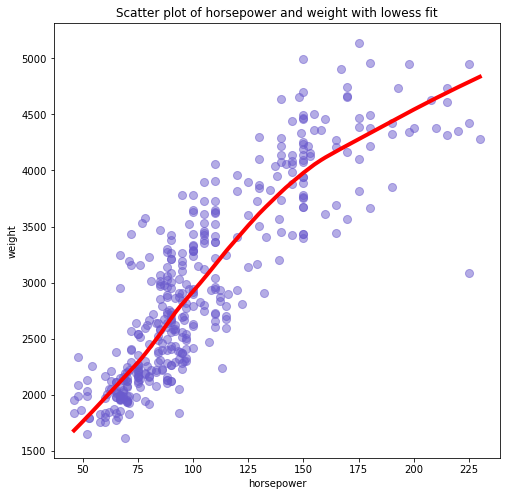

In [11]:
x = 'horsepower'
y = 'weight'
title = 'Scatter plot of horsepower and weight with lowess fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    lowess=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

A log model or quadratic model would not be sufficient

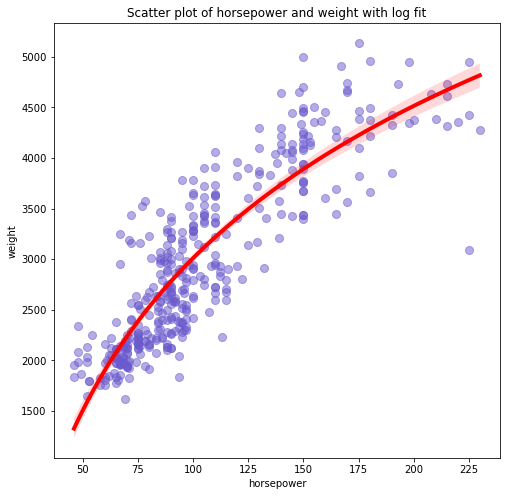

In [12]:
x = 'horsepower'
y = 'weight'
title = 'Scatter plot of horsepower and weight with log fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    logx=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

A cubic model works well at low and medium values of $x$, but seems to be off at high $x$ values

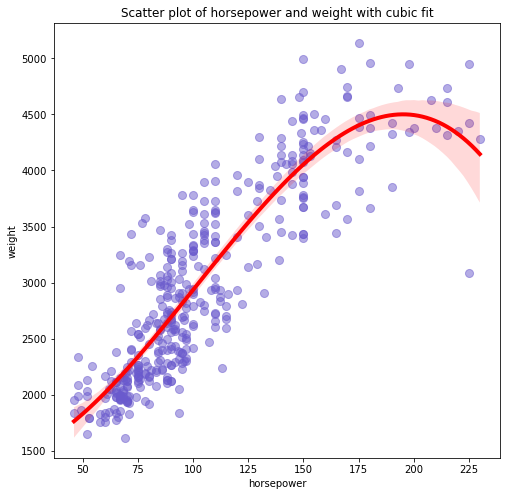

In [13]:
x = 'horsepower'
y = 'weight'
title = 'Scatter plot of horsepower and weight with cubic fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    order=3,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

## Logistic regression

If the target $y$ is binary -- it only has two unique values (conventionally, `0` and `1`), we can draw a logistic line to represent the probability of an instance being `1` based on $x$.

This data does not have a binary column, however, we can quickly create one. Below, I create `high_mpg` as an indicator of whether `mpg` of a car is higher than 25 or not

In [14]:
data['high_mpg'] = (data['mpg'] > 25)*1

When the target is binary, a regular regression models (regardless of linear, polynomial, or log) is no longer fitted to represent the correlation between the two columns

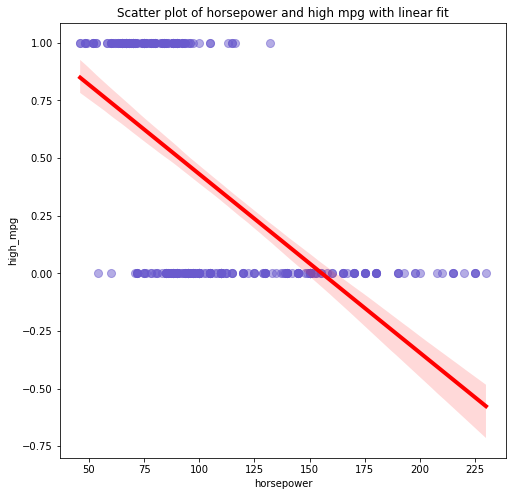

In [15]:
x = 'horsepower'
y = 'high_mpg'
title = 'Scatter plot of horsepower and high mpg with linear fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

A logistic model is designed to directly measure the probability of $y$ being `1` from $x$. Its equation is 

$P(y=1) = \dfrac{1}{1+e^{-(ax+b)}}$

In seaborn, we use the option `logistic=True` to fit a logistic line. Note that this model takes a bit longer to be drawn. Below is one example, you can see the line estimating the probability more smoothly and fitting the data much better than previously

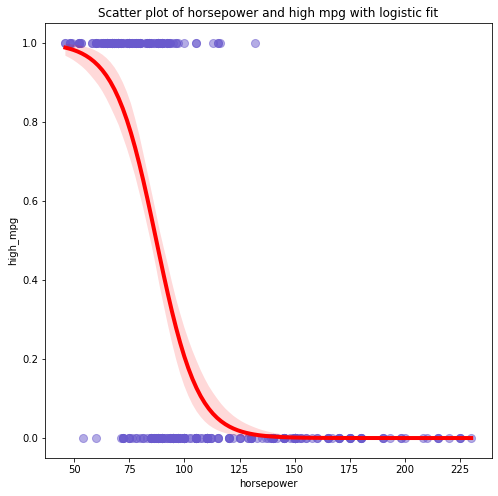

In [16]:
x = 'horsepower'
y = 'high_mpg'
title = 'Scatter plot of horsepower and high mpg with logistic fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    logistic=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

Another example

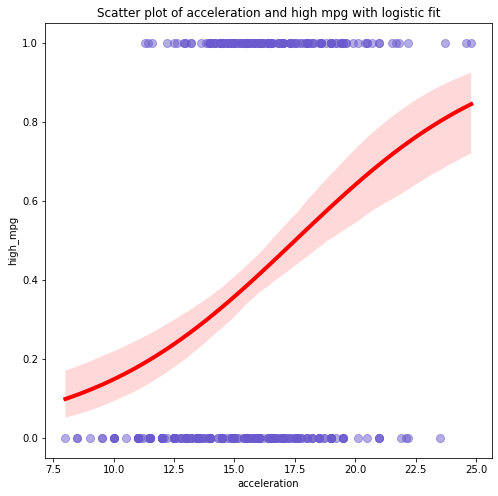

In [17]:
x = 'acceleration'
y = 'high_mpg'
title = 'Scatter plot of acceleration and high mpg with logistic fit'

plt.figure(figsize=(8,8))
sn.regplot(
    data=data,
    x=x,
    y=y,
    logistic=True,
    line_kws={'color':'red', 'linewidth':4},
    scatter_kws={'color':'slateblue','s':65, 'alpha':0.5}
)
plt.title(title)
plt.show()

## Stratifying models by a categorical column

We can stratify the correlation visualization between $x$ and $y$ with a categorical column. In this case, for each class in the stratifying column, a regression model will be fitted.

Drawing this plot is a bit more complicated. We need to write a loop to iterate through each class to perform model fitting and visualizing

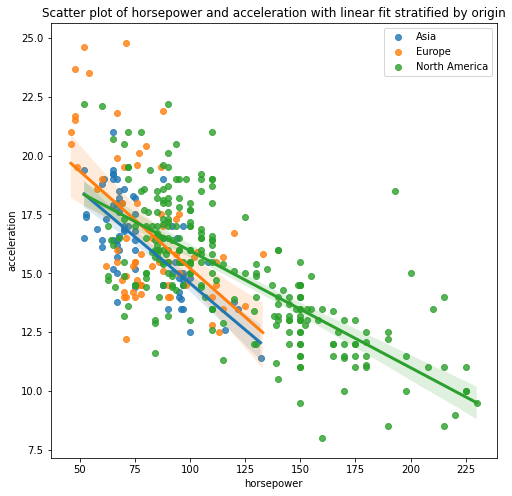

In [18]:
x = 'horsepower'
y = 'acceleration'
category = 'origin'
title = 'Scatter plot of horsepower and acceleration with linear fit stratified by origin'

plt.figure(figsize=(8,8))
for cat in np.unique(data[category]):
    sn.regplot(
        data=data[data[category]==cat],
        x=x,
        y=y,
        line_kws={'linewidth':3},
        label=cat
    )
plt.legend()
plt.title(title)
plt.show()

If you feel that the default coloring is a bit hard to see, you can change the color with a dictionary category-color

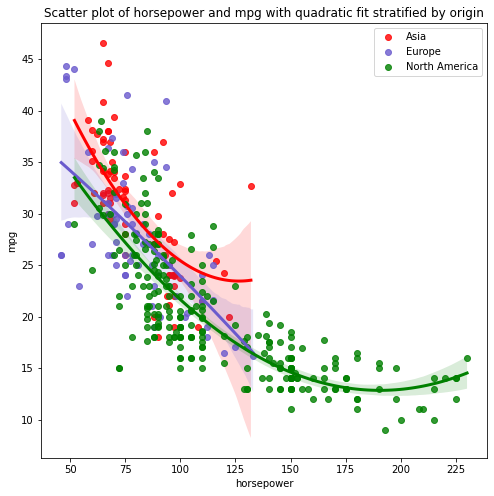

In [19]:
x = 'horsepower'
y = 'mpg'
category = 'origin'
cat_colors = ['red','slateblue','green']


color_map = dict(zip(np.unique(data[category]), cat_colors))
title = 'Scatter plot of horsepower and mpg with quadratic fit stratified by origin'

plt.figure(figsize=(8,8))
for cat in np.unique(data[category]):
    sn.regplot(
        data=data[data[category]==cat],
        x=x,
        y=y,
        order=2,
        color=color_map[cat],
        line_kws={'linewidth':3},
        label=cat
    )
plt.legend()
plt.title(title)
plt.show()

We can further vary the marker styles for each category, also with a dictionary

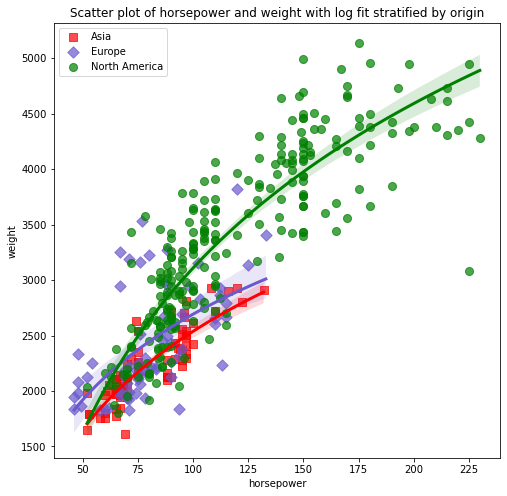

In [20]:
x = 'horsepower'
y = 'weight'
category = 'origin'
cat_markers = ['s','D','o']
cat_colors = ['red','slateblue','green']
title = 'Scatter plot of horsepower and weight with log fit stratified by origin'

marker_map = dict(zip(np.unique(data[category]), cat_markers))
color_map = dict(zip(np.unique(data[category]), cat_colors))
plt.figure(figsize=(8,8))
for cat in np.unique(data[category]):
    sn.regplot(
        data=data[data[category]==cat],
        x=x,
        y=y,
        logx=True,
        marker=marker_map[cat],
        color=color_map[cat],
        line_kws={'linewidth':3},
        scatter_kws={'s':65, 'alpha':0.7},
        label=cat
    )
plt.legend()
plt.title(title)
plt.show()

Drawing logistic lines is similar

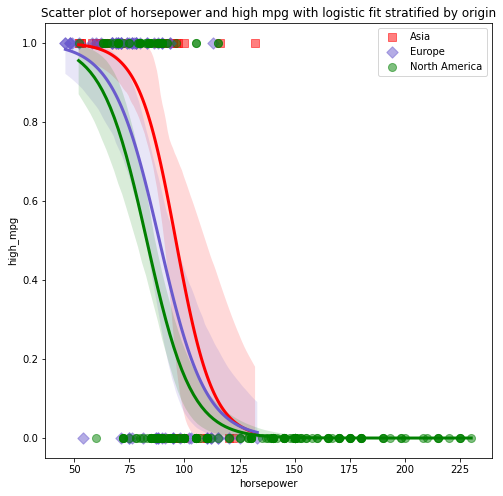

In [21]:
x = 'horsepower'
y = 'high_mpg'
category = 'origin'
cat_markers = ['s','D','o']
cat_colors = ['red','slateblue','green']
title = 'Scatter plot of horsepower and high mpg with logistic fit stratified by origin'

marker_map = dict(zip(np.unique(data[category]), cat_markers))
color_map = dict(zip(np.unique(data[category]), cat_colors))
plt.figure(figsize=(8,8))
for cat in np.unique(data[category]):
    sn.regplot(
        data=data[data[category]==cat],
        x=x,
        y=y,
        logistic=True,
        marker=marker_map[cat],
        color=color_map[cat],
        line_kws={'linewidth':3},
        scatter_kws={'s':65, 'alpha':0.5},
        label=cat
    )
plt.legend()
plt.title(title)
plt.show()